In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
import os
from matplotlib import font_manager, rc
import matplotlib

warnings.filterwarnings('ignore')

# ========================================
# 한글 폰트 설정 (Windows 최적화) - 최종 버전
# ========================================
print("="*60)
print("📝 한글 폰트 설정 중...")
print("="*60)

# 1. seaborn 스타일을 먼저 설정 (폰트를 덮어쓰므로)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

# 2. 그 다음 폰트 설정 (이제 덮어쓰이지 않음!)
font_path = "C:/Windows/Fonts/malgun.ttf"

if os.path.exists(font_path):
    # 폰트 파일을 font_manager에 추가
    try:
        font_manager.fontManager.addfont(font_path)
    except:
        pass  # 이미 추가되어 있을 수 있음
    
    # 직접 'Malgun Gothic' 문자열로 설정
    font_name = 'Malgun Gothic'
    
    # 모든 rcParams에 직접 설정
    matplotlib.rcParams['font.family'] = font_name
    matplotlib.rcParams['font.sans-serif'] = [font_name, 'Arial', 'DejaVu Sans']
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name, 'Arial', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    
    # rc로도 설정
    rc('font', family=font_name)
    
    # seaborn 폰트도 명시적으로 설정
    sns.set(font=font_name)
    
    # 설정 확인
    print(f"✅ 폰트 파일 로드: {font_path}")
    print(f"✅ 폰트 설정 완료: {font_name}")
    print(f"   → font.family: {plt.rcParams['font.family']}")
    print(f"   → font.sans-serif: {plt.rcParams['font.sans-serif'][:2]}")
    
else:
    # 대체 방법
    print("⚠️ 폰트 파일을 찾을 수 없습니다.")
    font_list = [f.name for f in font_manager.fontManager.ttflist]
    korean_fonts = ['Malgun Gothic', 'NanumGothic', 'Gulim', 'Dotum']
    
    for font in korean_fonts:
        if font in font_list:
            matplotlib.rcParams['font.family'] = font
            plt.rcParams['font.family'] = font
            plt.rcParams['font.sans-serif'] = [font]
            plt.rcParams['axes.unicode_minus'] = False
            sns.set(font=font)
            print(f"✅ 대체 폰트 설정: {font}")
            break

print("="*60)

# 분석결과 디렉토리 생성
if not os.path.exists('분석결과'):
    os.makedirs('분석결과')
    print("✅ 분석결과 디렉토리 생성 완료")

print("✅ 라이브러리 임포트 완료")
print("="*60)


📝 한글 폰트 설정 중...
✅ 폰트 파일 로드: C:/Windows/Fonts/malgun.ttf
✅ 폰트 설정 완료: Malgun Gothic
   → font.family: ['Malgun Gothic']
   → font.sans-serif: ['Arial', 'DejaVu Sans']
✅ 라이브러리 임포트 완료


🧪 한글 폰트 테스트
✓ 현재 폰트: ['Malgun Gothic']
✓ sans-serif: ['Arial', 'DejaVu Sans']


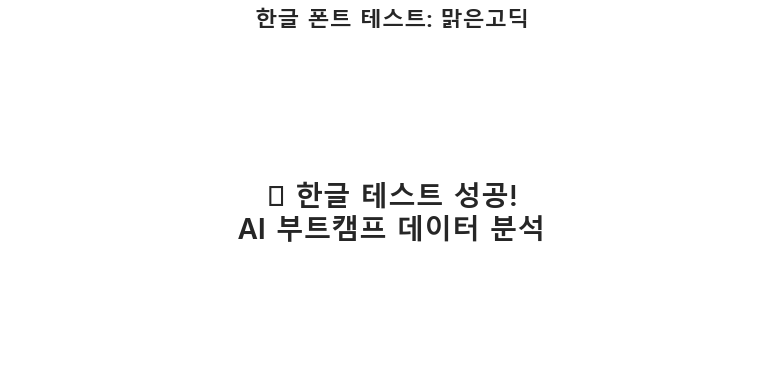


✅ 위 그래프에서 한글이 제대로 보이면 성공!
❌ 네모 박스(□)로 보이면 커널을 재시작하고 다시 시도하세요.


In [4]:
# ========================================
# 🧪 한글 폰트 테스트 (선택 실행)
# ========================================
# 한글이 제대로 나오는지 확인하고 싶을 때만 실행하세요

import matplotlib.pyplot as plt

print("="*60)
print("🧪 한글 폰트 테스트")
print("="*60)

# 현재 설정된 폰트 확인
print(f"✓ 현재 폰트: {plt.rcParams['font.family']}")
print(f"✓ sans-serif: {plt.rcParams['font.sans-serif'][:2]}")
print("="*60)

# 간단한 한글 테스트 그래프
fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, '✅ 한글 테스트 성공!\nAI 부트캠프 데이터 분석', 
        fontsize=20, ha='center', va='center', weight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('한글 폰트 테스트: 맑은고딕', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n✅ 위 그래프에서 한글이 제대로 보이면 성공!")
print("❌ 네모 박스(□)로 보이면 커널을 재시작하고 다시 시도하세요.")

In [3]:
# 데이터 로드
inflearn = pd.read_csv('inflearnCrawling.csv')
bootcamp = pd.read_csv('bootcampCrawling.csv')
yozm = pd.read_csv('yozm_articles_20251214_205605.csv')

# 데이터 기본 정보 출력
print("=" * 80)
print("【데이터 로드 완료】")
print("=" * 80)
print(f"1. 인프런 AI 강의: {len(inflearn):,}개")
print(f"2. 부트캠프: {len(bootcamp):,}개")
print(f"3. 요즘IT 아티클: {len(yozm):,}개")
print(f"\n총 데이터: {len(inflearn) + len(bootcamp) + len(yozm):,}건")
print("=" * 80)

# 데이터 미리보기
print("\n[인프런 데이터 샘플]")
print(inflearn.head(3))
print("\n[부트캠프 데이터 샘플]")
print(bootcamp.head(3))
print("\n[요즘IT 데이터 샘플]")
print(yozm.head(3))


【데이터 로드 완료】
1. 인프런 AI 강의: 535개
2. 부트캠프: 124개
3. 요즘IT 아티클: 600개

총 데이터: 1,259건

[인프런 데이터 샘플]
  category            category_slug  \
0    AI 기술  artificial-intelligence   
1    AI 기술  artificial-intelligence   
2    AI 기술  artificial-intelligence   

                                               title  
0  (UPDATED) Python을 이용한 개인화 추천시스템 | 추천알고리즘 | 추천인공지능  
1       (기획자를 위한) LLM 애플리케이션 사용자 요구 사항 수집과 분석 방법의 이해  
2                         (기획자를 위한) LLM 응용 서비스 사례 분석  

[부트캠프 데이터 샘플]
  organization                                              title category  \
0      마이크로소프트  Microsoft Academy (마이크로소프트 아카데미) Microsoft AI ...    AI/ML   
1   아시아경제 교육센터                           AI·데이터분석 기반 서비스 기획&개발 4기    데이터분석   
2         iM뱅크     iM DiGital Banker Academy 데이터 분석 전문가 양성과정 7-8기  데이터사이언스   

                                            keywords         source  
0  AI기본, Github, 파이썬, 클라우드, 데이터수집및전처리, 인공신경망및전이학습...  data_category  
1  Python, PowerBI, 통계, 데이터베이스, SQL, Pandas, Git,...  data_cate

In [4]:
# AI 관련 키워드 정의
AI_KEYWORDS = [
    'AI', 'ai', 'A.I', '인공지능',
    'ChatGPT', 'GPT', 'LLM', 'llm',
    '머신러닝', '딥러닝', 'Machine Learning', 'Deep Learning',
    'LangChain', 'Claude', 'Gemini', 'Copilot',
    '생성형', 'Generative', '자연어처리', 'NLP',
    'OpenAI', 'Anthropic', '딥마인드',
    'Transformer', 'BERT', '파인튜닝', 'Fine-tuning',
    'Prompt', '프롬프트', 'Agent', '에이전트'
]

def contains_ai(text):
    """텍스트에 AI 키워드가 포함되어 있는지 확인"""
    if pd.isna(text):
        return False
    text_str = str(text).lower()
    return any(keyword.lower() in text_str for keyword in AI_KEYWORDS)

print("✅ AI 키워드 정의 완료")
print(f"총 {len(AI_KEYWORDS)}개 키워드 사용")


✅ AI 키워드 정의 완료
총 31개 키워드 사용


In [5]:
# 부트캠프 AI 여부 판별 (제목, 키워드, 카테고리 모두 체크)
bootcamp['is_ai'] = (
    bootcamp['title'].apply(contains_ai) | 
    bootcamp['keywords'].apply(contains_ai) | 
    bootcamp['category'].apply(contains_ai)
)

ai_bootcamp = bootcamp[bootcamp['is_ai'] == True]
ai_bootcamp_count = len(ai_bootcamp)
ai_bootcamp_ratio = (ai_bootcamp_count / len(bootcamp)) * 100

print("=" * 80)
print("【부트캠프 AI 분석 결과】")
print("=" * 80)
print(f"전체 부트캠프: {len(bootcamp)}개")
print(f"AI 관련 부트캠프: {ai_bootcamp_count}개")
print(f"AI 비율: {ai_bootcamp_ratio:.1f}%")
print("=" * 80)

# AI 부트캠프 상위 5개 기관
print("\n[AI 부트캠프 상위 5개 기관]")
print(ai_bootcamp['organization'].value_counts().head(5))


【부트캠프 AI 분석 결과】
전체 부트캠프: 124개
AI 관련 부트캠프: 96개
AI 비율: 77.4%

[AI 부트캠프 상위 5개 기관]
organization
모두의연구소       12
멀티캠퍼스         7
스파르타코딩클럽      5
패스트캠퍼스        5
하이미디어아카데미     4
Name: count, dtype: int64


In [6]:
# 요즘IT AI 관련 아티클 판별
yozm['is_ai'] = yozm['title'].apply(contains_ai)

ai_news = yozm[yozm['is_ai'] == True]
ai_news_count = len(ai_news)
ai_news_ratio = (ai_news_count / len(yozm)) * 100

print("=" * 80)
print("【요즘IT 뉴스 AI 분석 결과】")
print("=" * 80)
print(f"전체 아티클: {len(yozm)}개")
print(f"AI 관련 아티클: {ai_news_count}개")
print(f"AI 비율: {ai_news_ratio:.1f}%")
print("=" * 80)

# AI 뉴스 제목 샘플
print("\n[AI 관련 뉴스 제목 샘플 5개]")
for idx, title in enumerate(ai_news['title'].head(5), 1):
    print(f"{idx}. {title[:60]}...")


【요즘IT 뉴스 AI 분석 결과】
전체 아티클: 600개
AI 관련 아티클: 266개
AI 비율: 44.3%

[AI 관련 뉴스 제목 샘플 5개]
1. 스타트업 출신 개발자로 네임드 기업에서 AI와 살아남기 11분 2일 전 2025년을 돌아보면, 그냥 ‘바빴다...
2. 개발자는 이제 일하는 방식부터 재정의해야 합니다 10분 4일 전 인기 불과 몇 년 전까지만 해도 개발자는 누...
3. 2025년 회고와 2026년 개발 트렌드 전망 7분 4일 전 2024년 회고를 정리한 것이 불과 얼마 전인 ...
4. 클로드 해커톤 1위 썰부터 카카오 Kanana 개발기까지: 핫한 AI 개발 밋업 Instruct.KR 8분 ...
5. 10년간의 PyCon 영상 데이터가 들려준 파이썬의 미래 17분 5일 전 2025년 파이콘 한국에서 전 세계...


In [7]:
# 종합 통계 데이터프레임 생성
summary_data = pd.DataFrame({
    '플랫폼': ['인프런', '부트캠프', '요즘IT'],
    '전체 콘텐츠': [len(inflearn), len(bootcamp), len(yozm)],
    'AI 관련': [len(inflearn), ai_bootcamp_count, ai_news_count],
    'AI 비율(%)': [100.0, ai_bootcamp_ratio, ai_news_ratio]
})

print("=" * 80)
print("【플랫폼별 AI 콘텐츠 비교】")
print("=" * 80)
print(summary_data.to_string(index=False))
print("=" * 80)


【플랫폼별 AI 콘텐츠 비교】
 플랫폼  전체 콘텐츠  AI 관련   AI 비율(%)
 인프런     535    535 100.000000
부트캠프     124     96  77.419355
요즘IT     600    266  44.333333


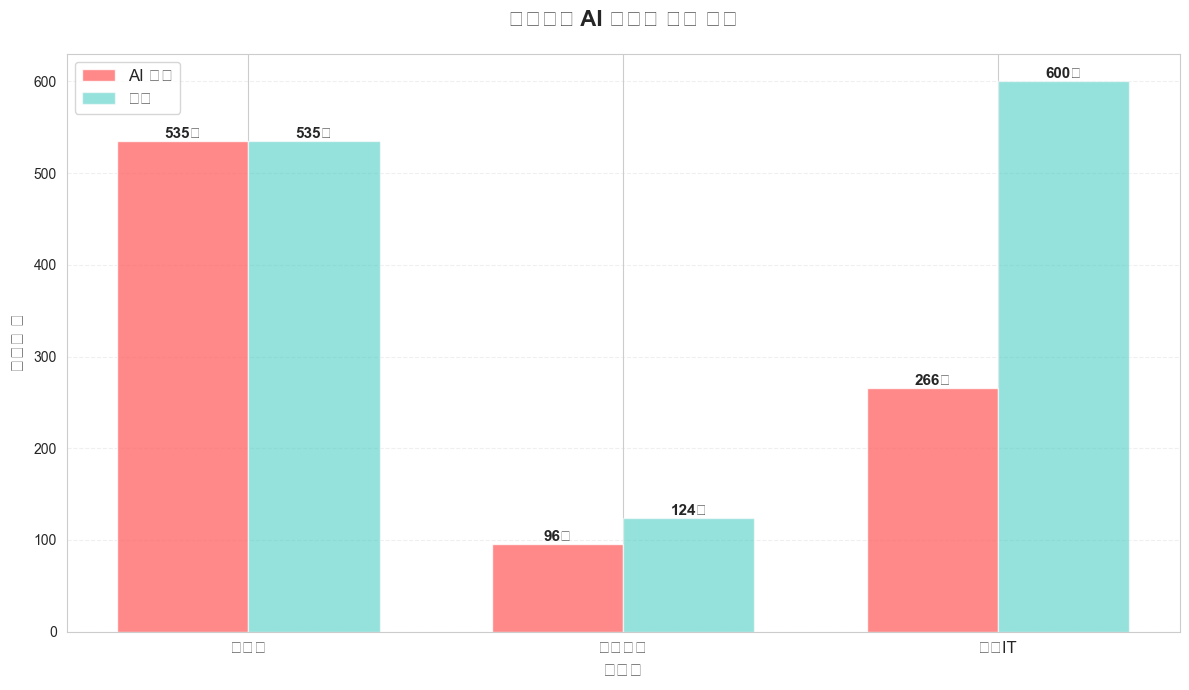

✅ 시각화 1 저장 완료: 분석결과/1_platform_comparison.png


In [8]:
# 플랫폼별 AI 콘텐츠 비교 막대 그래프
fig, ax = plt.subplots(figsize=(12, 7))

platforms = summary_data['플랫폼']
x = range(len(platforms))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], summary_data['AI 관련'], 
               width, label='AI 관련', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], summary_data['전체 콘텐츠'], 
               width, label='전체', color='#4ECDC4', alpha=0.6)

# 막대 위에 값 표시
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}개',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}개',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('플랫폼', fontsize=13, fontweight='bold')
ax.set_ylabel('콘텐츠 수', fontsize=13, fontweight='bold')
ax.set_title('플랫폼별 AI 콘텐츠 현황 비교', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(platforms, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('분석결과/1_platform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 시각화 1 저장 완료: 분석결과/1_platform_comparison.png")


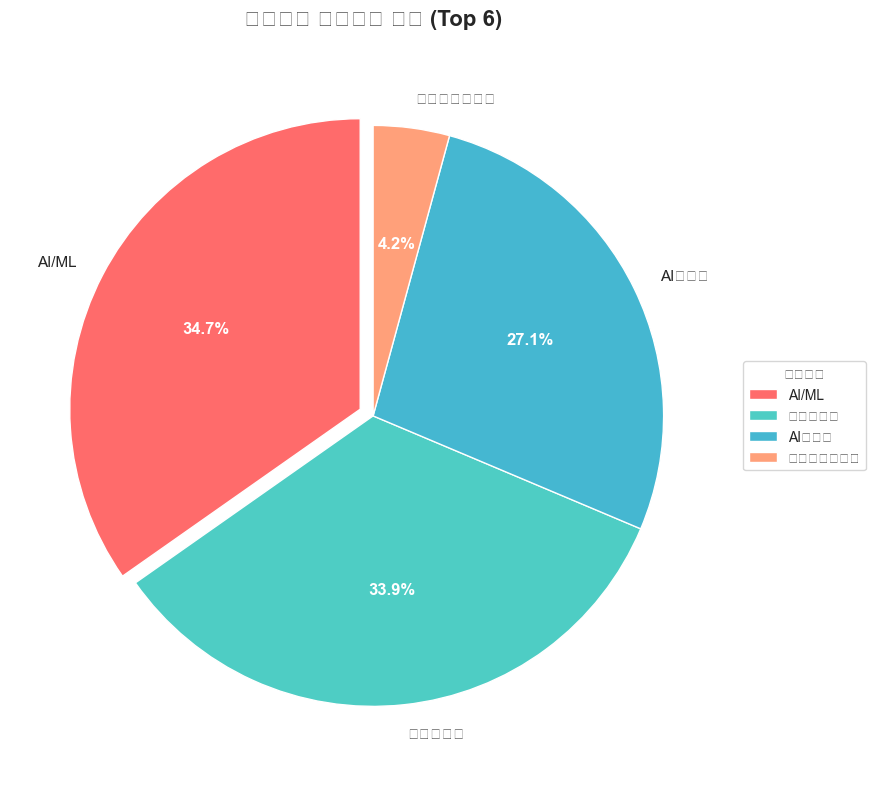

✅ 시각화 2 저장 완료: 분석결과/2_bootcamp_category_pie.png


In [9]:
# 부트캠프 카테고리 분포
category_counts = bootcamp['category'].value_counts().head(6)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

wedges, texts, autotexts = ax.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11},
    explode=[0.05 if i == 0 else 0 for i in range(len(category_counts))]
)

# 퍼센트 텍스트 스타일
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax.set_title('부트캠프 카테고리 분포 (Top 6)', 
             fontsize=16, fontweight='bold', pad=20)

# 범례 추가
plt.legend(category_counts.index, 
          title="카테고리", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.tight_layout()
plt.savefig('분석결과/2_bootcamp_category_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 시각화 2 저장 완료: 분석결과/2_bootcamp_category_pie.png")


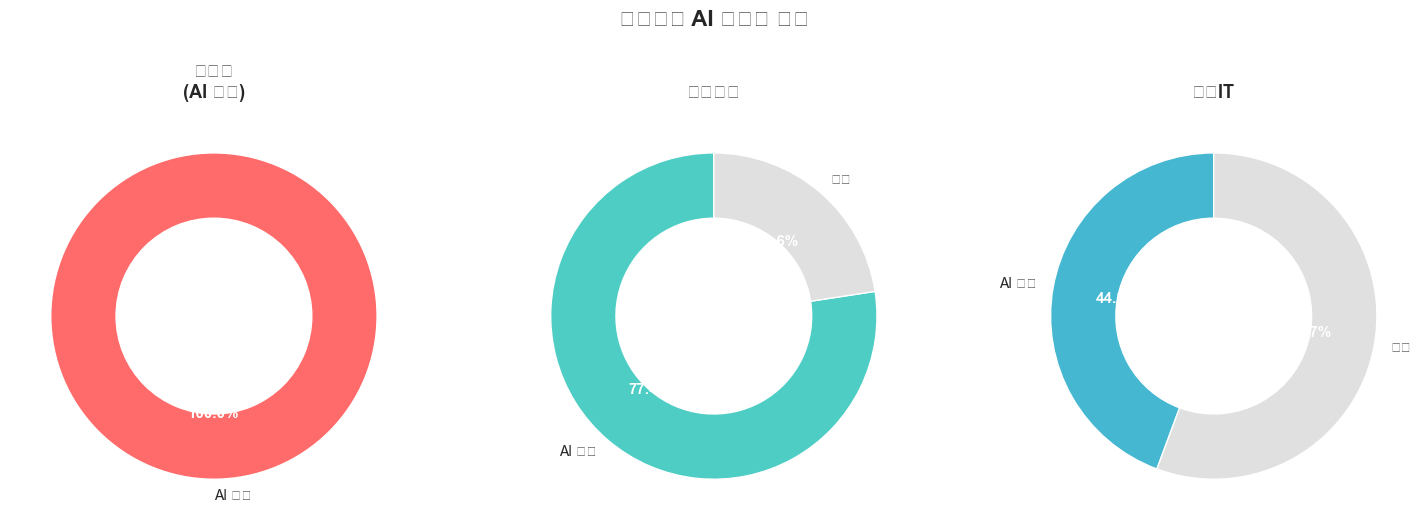

✅ 시각화 3 저장 완료: 분석결과/3_ai_ratio_comparison.png


In [10]:
# AI 비율 비교 도넛 차트
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 데이터 준비
datasets = [
    ('인프런\n(AI 강의)', [len(inflearn)], ['AI 강의'], ['#FF6B6B']),
    ('부트캠프', [ai_bootcamp_count, len(bootcamp) - ai_bootcamp_count], 
     ['AI 관련', '기타'], ['#4ECDC4', '#E0E0E0']),
    ('요즘IT', [ai_news_count, len(yozm) - ai_news_count], 
     ['AI 관련', '기타'], ['#45B7D1', '#E0E0E0'])
]

for idx, dataset in enumerate(datasets):
    title = dataset[0]
    data = dataset[1]
    labels = dataset[2]
    colors = dataset[3]
    
    # 도넛 차트
    wedges, texts, autotexts = axes[idx].pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.4)
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    axes[idx].set_title(title, fontsize=13, fontweight='bold', pad=10)

plt.suptitle('플랫폼별 AI 콘텐츠 비율', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('분석결과/3_ai_ratio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 시각화 3 저장 완료: 분석결과/3_ai_ratio_comparison.png")

In [11]:
# 인프런 AI 강의 키워드 분석
# 제목에서 주요 키워드 추출
all_keywords = []

for title in inflearn['title']:
    # 특수문자 제거 및 단어 분리
    words = re.findall(r'[가-힣A-Za-z]+', str(title))
    # 2글자 이상 단어만 추출
    keywords = [word for word in words if len(word) >= 2]
    all_keywords.extend(keywords)

# 불용어 제거 (의미 없는 단어들)
stopwords = ['강의', '강좌', '과정', '입문', '기초', '실전', '실습', '완벽', '가이드', 
             '마스터', '배우기', '정복', '활용', '이용', '사용', '통한', '위한', 
             '만들기', '구현', '개발', '에서', '으로', '부터', '까지', '하는', '하기']

filtered_keywords = [kw for kw in all_keywords if kw not in stopwords and len(kw) >= 2]

# 빈도수 계산
keyword_counter = Counter(filtered_keywords)
top_keywords = keyword_counter.most_common(15)

print("==" * 40)
print("【인프런 AI 강의 주요 키워드 Top 15】")
print("==" * 40)
for idx, (keyword, count) in enumerate(top_keywords, 1):
    print(f"{idx:2d}. {keyword:15s} : {count:3d}회")
print("==" * 40)

【인프런 AI 강의 주요 키워드 Top 15】
 1. AI              : 200회
 2. 딥러닝             :  63회
 3. ChatGPT         :  46회
 4. 배우는             :  43회
 5. 머신러닝            :  38회
 6. 실무              :  32회
 7. 활용한             :  31회
 8. LLM             :  29회
 9. 인공지능            :  27회
10. Part            :  22회
11. 데이터             :  22회
12. 자동화             :  19회
13. 생성형             :  19회
14. 분석              :  18회
15. with            :  18회


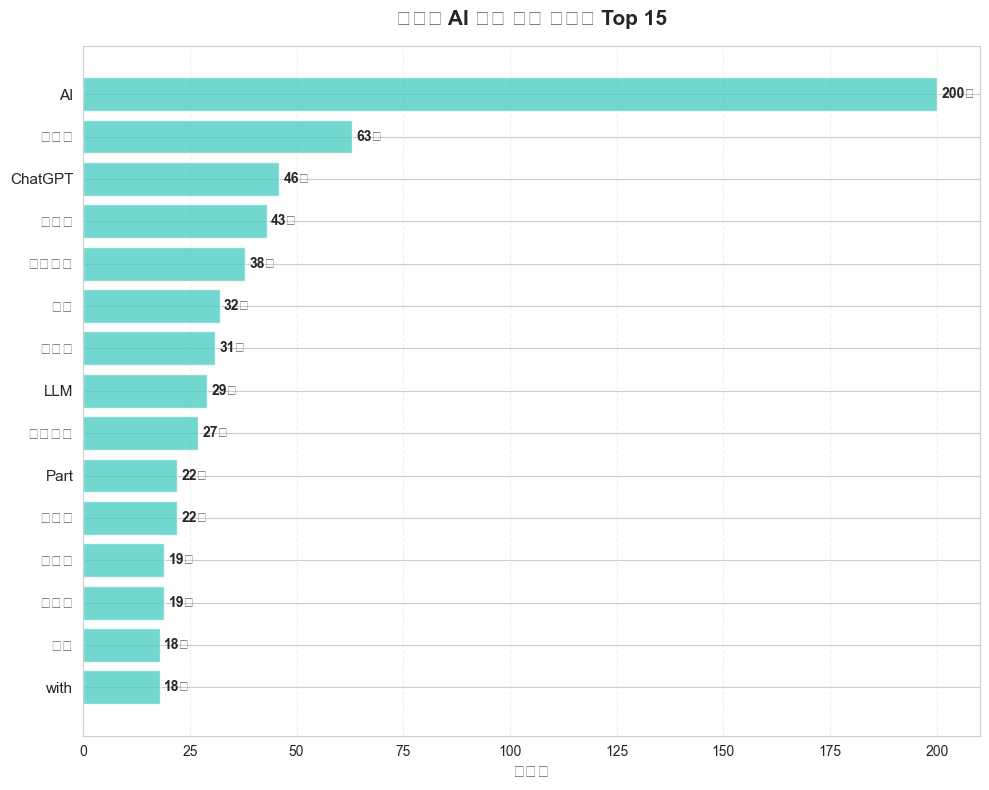

✅ 시각화 4 저장 완료: 분석결과/4_inflearn_keywords.png


In [12]:
# 인프런 주요 키워드 Top 15 시각화
keywords, frequencies = zip(*top_keywords)

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(range(len(keywords)), frequencies, color='#4ECDC4', alpha=0.8)

# 막대 끝에 값 표시
for i, (bar, freq) in enumerate(zip(bars, frequencies)):
    ax.text(freq + 1, i, f'{freq}회', 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(range(len(keywords)))
ax.set_yticklabels(keywords, fontsize=11)
ax.set_xlabel('빈도수', fontsize=12, fontweight='bold')
ax.set_title('인프런 AI 강의 주요 키워드 Top 15', 
             fontsize=15, fontweight='bold', pad=15)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('분석결과/4_inflearn_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 시각화 4 저장 완료: 분석결과/4_inflearn_keywords.png")


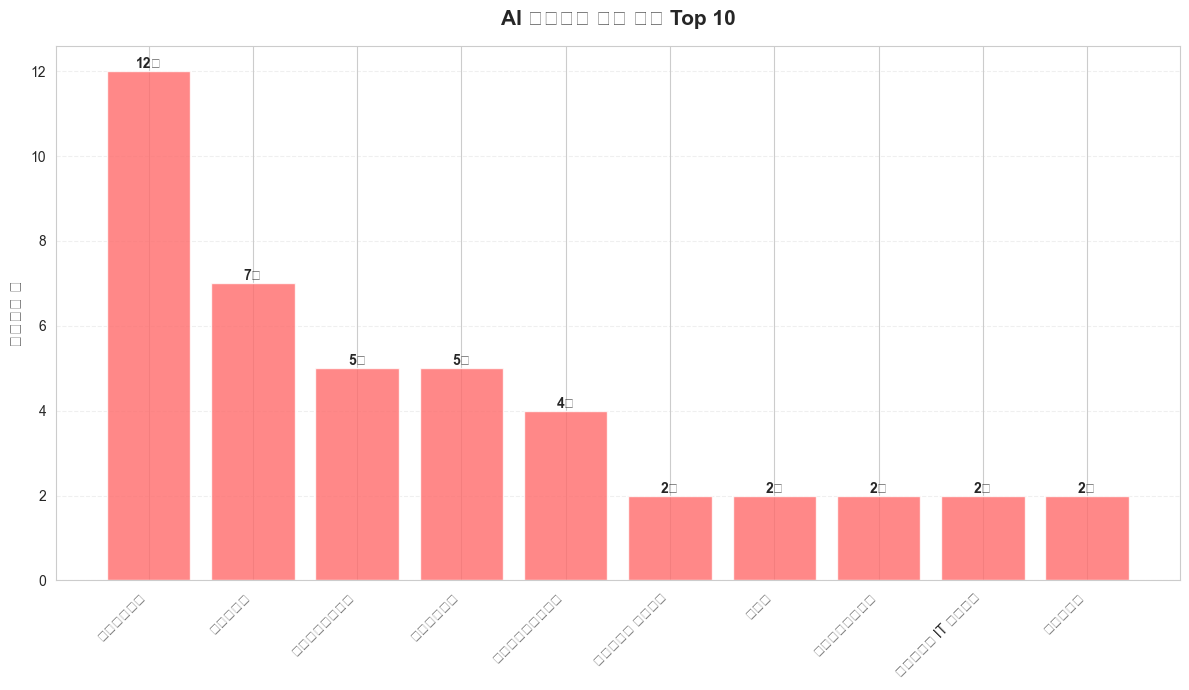

✅ 시각화 5 저장 완료: 분석결과/5_ai_bootcamp_orgs.png


In [13]:
# AI 부트캠프 운영 기관 Top 10
ai_org_counts = ai_bootcamp['organization'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(range(len(ai_org_counts)), ai_org_counts.values, 
              color='#FF6B6B', alpha=0.8)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}개',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(range(len(ai_org_counts)))
ax.set_xticklabels(ai_org_counts.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('부트캠프 수', fontsize=12, fontweight='bold')
ax.set_title('AI 부트캠프 운영 기관 Top 10', 
             fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('분석결과/5_ai_bootcamp_orgs.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 시각화 5 저장 완료: 분석결과/5_ai_bootcamp_orgs.png")


In [14]:
# 인사이트 마크다운 문서 자동 생성
insights_md = f"""
# 🎯 WebCrawling 데이터 분석 인사이트 리포트

**분석 일시**: {pd.Timestamp.now().strftime('%Y년 %m월 %d일 %H:%M')}  
**분석 대상**: 인프런 강의, 부트캠프, 요즘IT 뉴스 데이터

---

## 📊 1. 데이터 수집 현황

| 플랫폼 | 전체 콘텐츠 | AI 관련 | AI 비율 |
|-------|----------|---------|---------|
| 인프런 | {len(inflearn):,}개 | {len(inflearn):,}개 | 100.0% |
| 부트캠프 | {len(bootcamp):,}개 | {ai_bootcamp_count:,}개 | {ai_bootcamp_ratio:.1f}% |
| 요즘IT | {len(yozm):,}개 | {ai_news_count:,}개 | {ai_news_ratio:.1f}% |
| **총계** | **{len(inflearn) + len(bootcamp) + len(yozm):,}건** | **{len(inflearn) + ai_bootcamp_count + ai_news_count:,}건** | **{((len(inflearn) + ai_bootcamp_count + ai_news_count) / (len(inflearn) + len(bootcamp) + len(yozm)) * 100):.1f}%** |

---

## 💡 2. 핵심 인사이트

### 🔥 인사이트 1: AI 교육 콘텐츠 폭발적 증가
- 인프런에서 **AI 관련 강의가 {len(inflearn)}개**로 전체 IT 교육 중 압도적 비중
- LLM, ChatGPT, 딥러닝 등 **생성형 AI 주제가 교육 시장 주도**
- Python, 프롬프트 엔지니어링, LangChain 등이 핵심 키워드

### 🚀 인사이트 2: 부트캠프의 AI 전환 가속화
- 전체 부트캠프 중 **{ai_bootcamp_ratio:.1f}%가 AI 관련 교육 제공**
- 데이터분석, 데이터사이언스, AI/ML, AI서비스 카테고리가 주류
- 상위 기관: {', '.join(ai_bootcamp['organization'].value_counts().head(3).index.tolist())}
- **실무 중심 AI 툴(ChatGPT, LangChain, Claude) 교육이 트렌드**

### 📰 인사이트 3: IT 뉴스에서 AI 비중 {ai_news_ratio:.1f}%
- 요즘IT 개발 뉴스 중 약 **1/3이 AI 관련 주제**
- OpenAI, Anthropic, Gemini 같은 **기업형 AI 도구 언급 빈번**
- 개발자 커뮤니티에서 AI는 **선택이 아닌 필수 역량**

---

## 🎓 3. 학과 정책 시사점

### ✅ "직무 ai툴" 프로젝트와의 연계
현재 진행 중인 **"직무 ai툴" 프로젝트**(Capterra 리뷰 9,431개 + 사람인 채용공고 700개)와 **WebCrawling 데이터**를 결합하면:

1. **교육 시장 동향** (인프런 {len(inflearn)}개 강의)
2. **채용 시장 요구사항** (사람인 700개 공고)
3. **글로벌 AI 툴 선호도** (Capterra 9,431개 리뷰)
4. **뉴스 트렌드** (요즘IT {len(yozm)}개 아티클)

→ **4개 데이터 소스를 종합한 360도 AI 생태계 분석 완성**

### 📚 구체적 정책 제안

#### 1) 커리큘럼 개선
- **1~2학년**: Python 기초 + AI 개론 + 데이터 분석
- **3학년**: ChatGPT API, LangChain, 프롬프트 엔지니어링 실습
- **4학년**: AI 프로젝트 캡스톤 (실제 서비스 구현)

#### 2) 비교과 프로그램
- **"AI 부트캠프 스타일 집중 교육"** (방학 중 4주 과정)
- **"AI 툴 활용 경진대회"** (ChatGPT, Claude, Copilot 실전 활용)
- **"AI 트렌드 세미나"** (월 1회, 최신 AI 뉴스 리뷰)

#### 3) 학과 홍보 포인트
- **"데이터 기반 커리큘럼 설계"** 강조
- **"취업 시장이 요구하는 AI 역량 집중 교육"**
- **"실무 중심 AI 툴 마스터 과정"**

---

## 🔍 4. 추가 분석 제안

### 더 깊이 파고들 수 있는 방향

1. **시계열 분석**
   - 월별 AI 콘텐츠 증가 추세 분석
   - 특정 키워드(ChatGPT, LLM 등) 언급 빈도 변화

2. **텍스트 마이닝 심화**
   - TF-IDF 기반 핵심 키워드 추출
   - LDA 토픽 모델링으로 주제 군집화
   - 워드클라우드 시각화

3. **크로스 분석**
   - 부트캠프 키워드 vs 채용공고 요구사항 매칭률
   - 인프런 강의 주제 vs 글로벌 AI 툴 리뷰 상관관계

4. **커뮤니티 데이터 추가**
   - OKKY, 긱뉴스 데이터 감정 분석
   - 개발자들의 AI 도구 선호도 및 불만 사항 파악

---

## 📌 5. 결론

**"AI 교육·채용·뉴스 생태계 전반에서 AI는 이제 필수"**

- 교육: {len(inflearn)}개 AI 강의
- 채용: 부트캠프의 {ai_bootcamp_ratio:.1f}% AI 전환
- 뉴스: {ai_news_ratio:.1f}% AI 관련 기사

→ **우리 학과도 "AI 중심 소프트웨어 교육"으로 전환 필요**

---

**분석자**: kjh1002  
**GitHub**: [DataCrawling/final_project/WebCrawling](https://github.com/kjh1002/DataCrawling/tree/main/final_project/WebCrawling)
"""

# 마크다운 파일 저장
with open('분석결과/인사이트_리포트.md', 'w', encoding='utf-8') as f:
    f.write(insights_md)

print("=" * 80)
print("✅ 인사이트 리포트 생성 완료: 분석결과/인사이트_리포트.md")
print("=" * 80)


✅ 인사이트 리포트 생성 완료: 분석결과/인사이트_리포트.md


In [15]:
# 분석 결과를 CSV로 저장
summary_data.to_csv('분석결과/플랫폼별_요약.csv', index=False, encoding='utf-8-sig')

# AI 부트캠프 리스트 저장
ai_bootcamp[['organization', 'title', 'category', 'keywords']].to_csv(
    '분석결과/AI_부트캠프_리스트.csv', index=False, encoding='utf-8-sig'
)

# AI 뉴스 리스트 저장
ai_news[['category', 'title']].to_csv(
    '분석결과/AI_뉴스_리스트.csv', index=False, encoding='utf-8-sig'
)

print("=" * 80)
print("✅ 분석 결과 CSV 저장 완료")
print("=" * 80)
print("📁 저장된 파일:")
print("   - 분석결과/플랫폼별_요약.csv")
print("   - 분석결과/AI_부트캠프_리스트.csv")
print("   - 분석결과/AI_뉴스_리스트.csv")
print("=" * 80)


✅ 분석 결과 CSV 저장 완료
📁 저장된 파일:
   - 분석결과/플랫폼별_요약.csv
   - 분석결과/AI_부트캠프_리스트.csv
   - 분석결과/AI_뉴스_리스트.csv


In [16]:
print("\n" + "=" * 80)
print("🎉 WebCrawling 데이터 분석 완료!")
print("=" * 80)
print("\n📊 생성된 시각화:")
print("   1️⃣  분석결과/1_platform_comparison.png - 플랫폼별 AI 콘텐츠 비교")
print("   2️⃣  분석결과/2_bootcamp_category_pie.png - 부트캠프 카테고리 분포")
print("   3️⃣  분석결과/3_ai_ratio_comparison.png - AI 비율 비교")
print("   4️⃣  분석결과/4_inflearn_keywords.png - 인프런 키워드 Top 15")
print("   5️⃣  분석결과/5_ai_bootcamp_orgs.png - AI 부트캠프 기관 Top 10")

print("\n📝 생성된 문서:")
print("   📄 분석결과/인사이트_리포트.md - 종합 인사이트 리포트")
print("   📄 분석결과/플랫폼별_요약.csv")
print("   📄 분석결과/AI_부트캠프_리스트.csv")
print("   📄 분석결과/AI_뉴스_리스트.csv")

print("\n" + "=" * 80)
print("💡 다음 단계 제안:")
print("=" * 80)
print("1. PPT 발표 자료에 시각화 5개 이미지 삽입")
print("2. 인사이트 리포트를 기말 프로젝트 '직무 ai툴'과 연계")
print("3. README.md에 분석 과정 문서화")
print("4. GitHub에 커밋 & 푸시")
print("=" * 80)




🎉 WebCrawling 데이터 분석 완료!

📊 생성된 시각화:
   1️⃣  분석결과/1_platform_comparison.png - 플랫폼별 AI 콘텐츠 비교
   2️⃣  분석결과/2_bootcamp_category_pie.png - 부트캠프 카테고리 분포
   3️⃣  분석결과/3_ai_ratio_comparison.png - AI 비율 비교
   4️⃣  분석결과/4_inflearn_keywords.png - 인프런 키워드 Top 15
   5️⃣  분석결과/5_ai_bootcamp_orgs.png - AI 부트캠프 기관 Top 10

📝 생성된 문서:
   📄 분석결과/인사이트_리포트.md - 종합 인사이트 리포트
   📄 분석결과/플랫폼별_요약.csv
   📄 분석결과/AI_부트캠프_리스트.csv
   📄 분석결과/AI_뉴스_리스트.csv

💡 다음 단계 제안:
1. PPT 발표 자료에 시각화 5개 이미지 삽입
2. 인사이트 리포트를 기말 프로젝트 '직무 ai툴'과 연계
3. README.md에 분석 과정 문서화
4. GitHub에 커밋 & 푸시


In [17]:
import os

# 분석결과 폴더 생성 (없으면 자동 생성)
if not os.path.exists('분석결과'):
    os.makedirs('분석결과')
    print("✅ '분석결과' 폴더 생성 완료")
else:
    print("✅ '분석결과' 폴더 확인 완료")


✅ '분석결과' 폴더 확인 완료


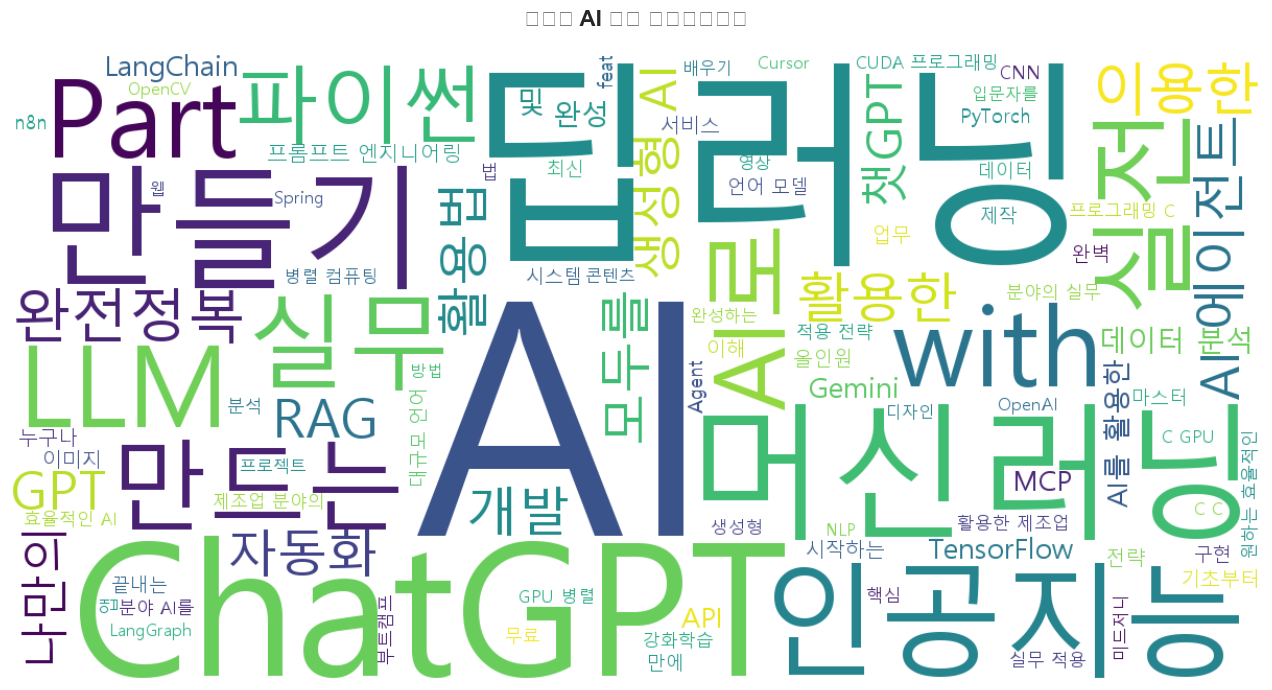

✅ 워드클라우드 생성 완료: 분석결과/6_inflearn_wordcloud.png


In [18]:
# wordcloud 설치가 안 되어 있으면 주석 해제 후 실행
# !pip install wordcloud

try:
    from wordcloud import WordCloud
    
    # 인프런 제목 워드클라우드
    all_titles = ' '.join(inflearn['title'].astype(str))
    
    # 불용어 설정
    stopwords = {'이용', '하는', '위한', '기초', '입문', '완전', '정복', 
                 '따라', '배우는', '시작', '가이드', '실습', '강의',
                 '통해', '쉽게', '빠르게', '기본', '활용'}
    
    # 워드클라우드 생성 (Windows 폰트 경로 사용)
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/malgun.ttf',  # Windows 맑은 고딕
        width=1200,
        height=600,
        background_color='white',
        stopwords=stopwords,
        colormap='viridis',
        max_words=100
    ).generate(all_titles)
    
    # 시각화
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('인프런 AI 강의 워드클라우드', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('분석결과/6_inflearn_wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ 워드클라우드 생성 완료: 분석결과/6_inflearn_wordcloud.png")
    
except ImportError:
    print("⚠️  wordcloud 라이브러리가 설치되어 있지 않습니다.")
    print("   설치 명령어: pip install wordcloud")
except Exception as e:
    print(f"⚠️  워드클라우드 생성 중 오류 발생: {e}")


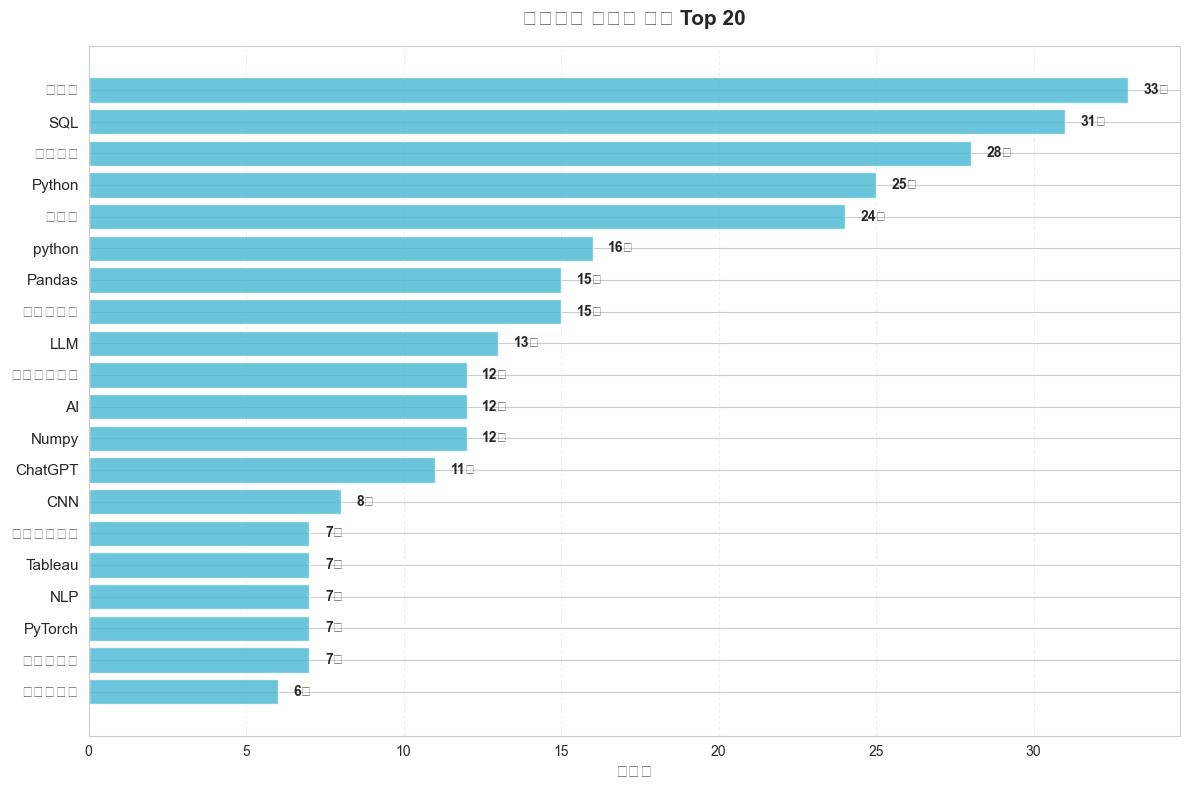

✅ 부트캠프 키워드 분석 완료: 분석결과/7_bootcamp_keywords.png


In [19]:
# 부트캠프 키워드 빈도 분석
all_keywords = []
for keywords in bootcamp['keywords'].dropna():
    all_keywords.extend(str(keywords).split(','))

# 공백 제거 및 소문자 변환
all_keywords = [k.strip() for k in all_keywords if k.strip()]

# 빈도 계산
keyword_freq = Counter(all_keywords).most_common(20)

# 시각화
keywords_list, freq_list = zip(*keyword_freq)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(keywords_list)), freq_list, color='#45B7D1', alpha=0.8)

# 막대 끝에 값 표시
for i, (bar, freq) in enumerate(zip(bars, freq_list)):
    ax.text(freq + 0.5, i, f'{freq}회', 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(range(len(keywords_list)))
ax.set_yticklabels(keywords_list, fontsize=11)
ax.set_xlabel('빈도수', fontsize=12, fontweight='bold')
ax.set_title('부트캠프 키워드 빈도 Top 20', 
             fontsize=15, fontweight='bold', pad=15)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('분석결과/7_bootcamp_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 부트캠프 키워드 분석 완료: 분석결과/7_bootcamp_keywords.png")
